# Лаба 2.1
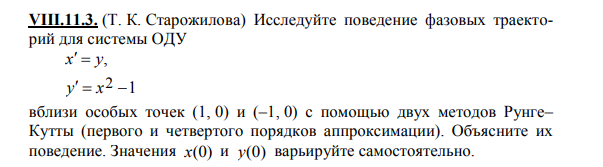

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Метод Рунге-Кутты(явный) 3-го порядка

In [2]:
def RungeKutteOneIterate(xn: float, yn: float, h: float, x_func, y_func):
    k1x = h * x_func(xn, yn)
    k1y = h * y_func(xn, yn)

    k2x = h * x_func(xn + k1x / 3, yn + k1y / 3)
    k2y = h * y_func(xn + k1x / 3, yn + k1y / 3)

    k3x = h * x_func(xn + 2 * k2x / 3, yn + 2 * k2y / 3)
    k3y = h * y_func(xn + 2 * k2x / 3, yn + 2 * k2y / 3)

    x_n_1 = xn + (k1x + 3 * k3x) / 4
    y_n_1 = yn + (k1y + 3 * k3y) / 4

    return [x_n_1, y_n_1]

def RungeKutte(x0: float, y0: float, h: float, N: int, x_func, y_func): 
    SolveArray: list = list()
    SolveArray.append([x0, y0])
    for i in range(N):
        SolveArray.append(RungeKutteOneIterate(SolveArray[len(SolveArray) - 1][0], SolveArray[len(SolveArray) - 1][1], h, x_func, y_func))
    return SolveArray


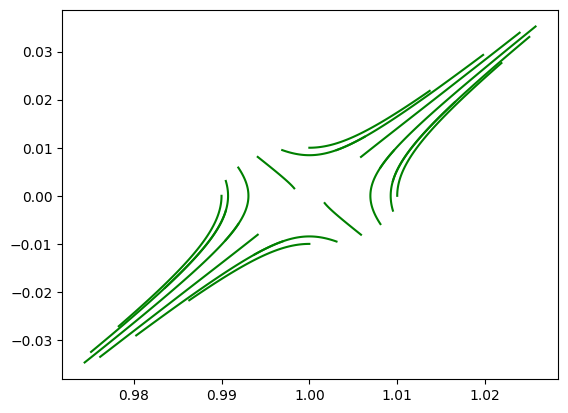

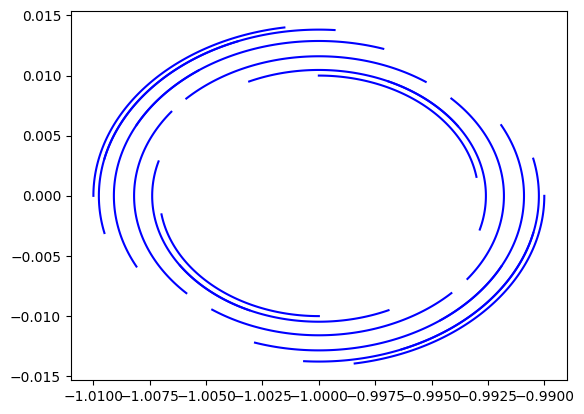

In [3]:
def x_func(x: int, y: int):
    return y
def y_func(x: int, y: int):
    return x  **  2 - 1

def SolveRungeKutte():
    R = 0.01
    for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
        SolvedData = RungeKutte(1 + R * np.cos(phi), R * np.sin(phi), 0.01, 100, x_func, y_func)
        plt.plot(*zip(*SolvedData), color='green')
    plt.show()
    for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
        SolvedData = RungeKutte(-1 + R * np.cos(phi), R * np.sin(phi), 0.01, 100, x_func, y_func)
        plt.plot(*zip(*SolvedData), color='blue')
    plt.show()

SolveRungeKutte()

### Метод Адамса-Башфорта 3-го порядка

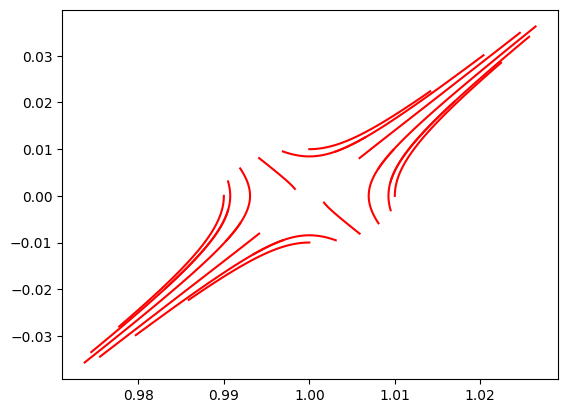

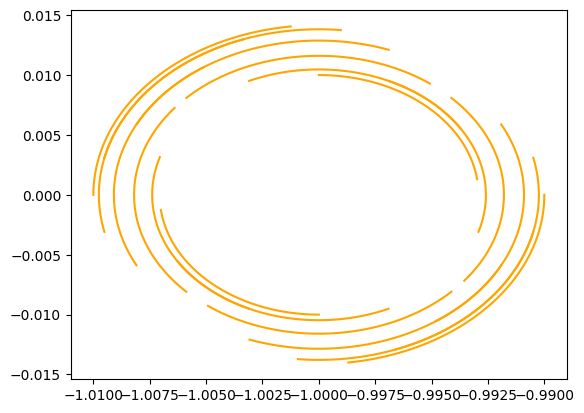

In [4]:
def AdamsBashfortOneIterate(SolveArray, h: float, x_func, y_func):
    x_n_1 = SolveArray[2][0] + h / 12 * (23 * x_func(SolveArray[2][0], SolveArray[2][1]) - 16 * x_func(SolveArray[1][0], SolveArray[1][1]) + 5 * x_func(SolveArray[0][0], SolveArray[0][1]))
    y_n_1 = SolveArray[2][1] + h / 12 * (23 * y_func(SolveArray[2][0], SolveArray[2][1]) - 16 * y_func(SolveArray[1][0], SolveArray[1][1]) + 5 * y_func(SolveArray[0][0], SolveArray[0][1]))
    return [x_n_1, y_n_1]

def AdamsBashfort(x0: float, y0: float, h: float, N: int, x_func, y_func): 
    SolvedData = RungeKutte(x0, y0, h, 2, x_func, y_func)
    for i in range(N):
        SolvedData.append(AdamsBashfortOneIterate(SolvedData[len(SolvedData) - 3:], h, x_func, y_func))
    return SolvedData

def SolveAdamsBashfort():
    R = 0.01
    for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
        SolvedData = AdamsBashfort(1 + R * np.cos(phi), R * np.sin(phi), 0.01, 100, x_func, y_func)
        plt.plot(*zip(*SolvedData), color='red')
    plt.show()
    for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
        SolvedData = AdamsBashfort(-1 + R * np.cos(phi), R * np.sin(phi), 0.01, 100, x_func, y_func)
        plt.plot(*zip(*SolvedData), color='orange')
    plt.show()

SolveAdamsBashfort()



### Метод ФДН 3 порядка:
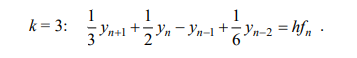

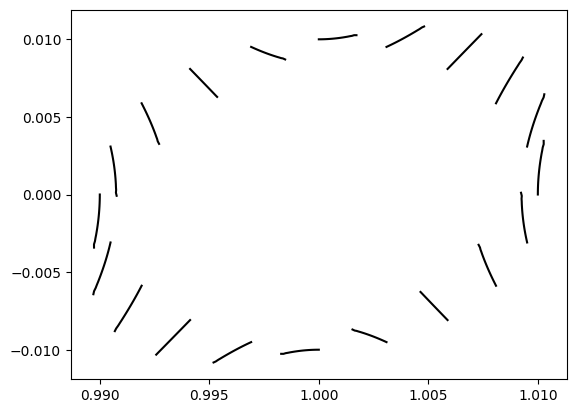

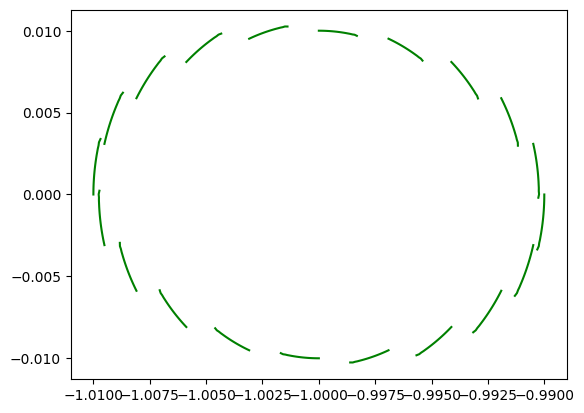

In [5]:
def FDNOneIterate(SolveArray, h: float, x_func, y_func):
    x_n_1 = 3 * h * x_func(SolveArray[2][0], SolveArray[2][1]) - 3 / 2 * SolveArray[2][0] + 3 * SolveArray[1][0] - 1 / 2 * SolveArray[0][0]
    y_n_1 = 3 * h * y_func(SolveArray[2][0], SolveArray[2][1]) - 3 / 2 * SolveArray[2][1] + 3 * SolveArray[1][1] - 1 / 2 * SolveArray[0][1]
    return [x_n_1, y_n_1]

def FDN(x0: float, y0: float, h: float, N: int, x_func, y_func): 
    SolvedData = RungeKutte(x0, y0, h, 2, x_func, y_func)
    for i in range(N):
        SolvedData.append(FDNOneIterate(SolvedData[len(SolvedData) - 3:], h, x_func, y_func))
    return SolvedData

def SolveFDN():
    R = 0.01
    for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
        SolvedData = FDN(1 + R * np.cos(phi), R * np.sin(phi), 0.01, 15, x_func, y_func)
        plt.plot(*zip(*SolvedData), color='black')
    plt.show()
    for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
        SolvedData = FDN(-1 + R * np.cos(phi), R * np.sin(phi), 0.01, 15, x_func, y_func)
        plt.plot(*zip(*SolvedData), color='green')
    plt.show()

SolveFDN()